In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [5]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [15]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

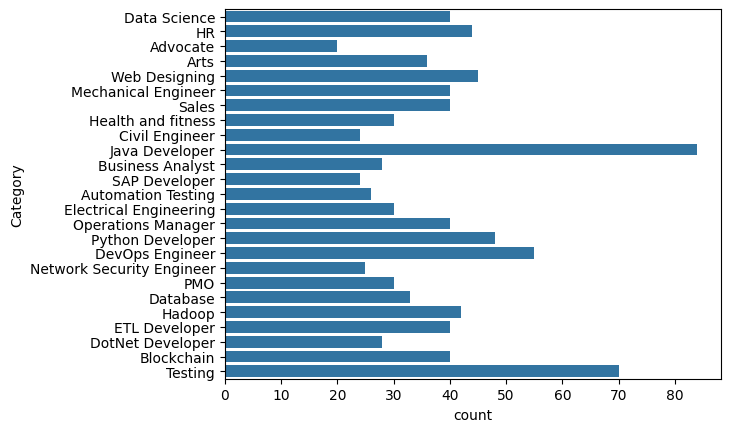

In [16]:
sns.countplot(df['Category'])

In [17]:
df['Resume'][1]

'Education Details \r\nMay 2013 to May 2017 B.E   UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia                               Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatment, outlier detection, encoding, scaling, feature selection and dimensionality reduction.\r\nDeployed automated classification and regression model.\r\nlinkedin.com/in/aditya-rathore-\r\nb4600b146        

In [18]:
import re

In [19]:
import re
from nltk.corpus import stopwords

def clean_text(txt):
    # 1. Remove URLs
    txt1 = re.sub(r'https?://\S+|www\.\S+', ' ', txt)

    # 2. Remove Gmail addresses
    txt2 = re.sub(r'[A-Za-z0-9._%+-]+@g+[A-Za-z0-9._%+-]+\.com', ' ', txt1)

    # 3. Remove @gmail.com text alone (if present)
    txt3 = re.sub(r'@gmail\.com', ' ', txt2)

    # 4. Remove hashtags (#) and mentions (@word)
    txt4 = re.sub(r'[@#]\w+', ' ', txt3)

    # 5. Remove all symbols/punctuation
    txt5 = re.sub(r'[^A-Za-z0-9\s]', ' ', txt4)

    # 6. Remove extra spaces
    txt6 = re.sub(r'\s+', ' ', txt5).strip()

    # 7. Remove stopwords
    stop_words = set(stopwords.words('english'))
    txt7 = " ".join([word for word in txt6.split() if word.lower() not in stop_words])

    return txt7


In [20]:
clean_text("my ###########websit like this http://hellworl #and access it masood@gmael.com### data science \r\n*")

'like access data science'

In [21]:
df['Resume'] = df['Resume'].apply(lambda x: clean_text(x))

In [22]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists accelerating review process run a

In [23]:
df['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
le.fit(df['Category'])

LabelEncoder()

In [26]:
df['Category'] = le.transform(df['Category'])
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

## Vectorization

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
vectored_resume = tfidf.transform(df['Resume'])

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(vectored_resume,df['Category'], test_size=0.2, random_state=42)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rf_model = OneVsRestClassifier(RandomForestClassifier())
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

In [41]:
import pickle
# pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(rf_model,open('rf_model.pkl','wb'))

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train,y_train)
ypred = clf.predict(x_test)
accuracy_score(y_test,y_pred=ypred)

0.9844559585492227

## Prediction system

In [32]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [33]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""


In [44]:
import pickle
pickle_resume_clf = pickle.load(open('clf.pkl','rb'))
cleaned_resume = clean_text(m2)
input_features = tfidf.transform([cleaned_resume])

prediction_id = pickle_resume_clf.predict(input_features)[0]

categories = {
    15:"Java Developer",
    20:"Python Developer",
    23:"Testing",
    8:"DevOps Engineer",
    24:"Web Designing",
    12:"HR",
    13:"Hadoop",
    3:"Blockchain",
    10:"ETL Developer",
    18:"Operations Manager",
    6:"Data Science",
    22:"Sales",
    16:"Mechanical Engineer",
    1:"Arts",
    7:"Database",
    11:"Electrical Engineering",
    14:"Health and fitness",
    19:"PMO",
    4:"Business Analyst",
    9:"DotNet Developer",
    2:"Automation Testing",
    17:"Network Security Engineer",
    21:"SAP Developer",
    5:"Civil Engineer",
    0:"Advocate",
}
category_name = categories.get(prediction_id,"unkown")
category_name


'Data Science'

In [43]:
m2 = """
MASOODALAMKAZI
 masoodkazi58@gmail.com
 EXPERIENCE
 9538638071 linkedin.com/in/masood-kazi-57b073318
 08/2025 – Present
 EDUCATION
 Machine Learning Engineer
 •
 Armtronix IoT Pvt Ltd.
 Developed and deployed YOLOv5/YOLOv8 computer vision models for real-time 
industrial safety and worker monitoring.
 •
 Engineered automated Quality Control (QC) systems to detect product defects 
using Jetson edge-computing platforms.
 •
 Optimized training pipelines through hyperparameter tuning, learning rate 
scheduling, and batch size adjustments.
 Integrated trained models into testing applications using PyTorch and OpenCV.
 •
 2020 – 2024
 SKILLS
 Bachelor of Engineering in Computer Science and Engineering
 Jain College Of Engineering and Technology, Hubballi
 Languages: Python, C++
 Frameworks & Libraries: TensorFlow, PyTorch,
 Keras, OpenCV, Scikit-learn, XGBoost, LightGBM,
 Django
 Machine Learning & Deep Learning: Object 
Detection, Image Segmentation, Model 
Optimization, Edge Deployment
 Machine Learning Projects
 Tools & Databases: Git, GitHub, Power BI, MySQL, 
Streamlit, Postman
 Soft Skills: Problem Solving, Collaboration, 
Analytical Thinking
 •
 1. Exploratory Data Analysis of Stock Market Trends
 Analyzed Yahoo Finance datasets using Pandas and visualization libraries to uncover trends and 
correlations.
 2. Movie Recommendation System
 •
 Built a content-based recommender system using CountVectorizer and cosine similarity; deployed via 
Streamlit.
 3. Object Detection with YOLO
 •
 Implemented real-time object detection using YOLO for classification in image and video streams.
 4. Image Segmentation with YOLO
 •
 Developed a segmentation model for precise object boundary detection with data augmentation 
techniques.
 5. Blog Website using Django
 •
 Designed a dynamic, user-authenticated blogging platform featuring full CRUD functionality and Django 
ORM
 ADDITIONAL ACHIEVEMENTS
 Solved 160+ LeetCode problems, demonstrating strong algorithmic and problem-solving skills.
 •
 •
 Automated manual reporting processes using Python and Power BI, improving efficiency and reducing 
human errors.
 Experienced in working within Agile/Scrum environments and contributing to process improvements
"""

In [ ]:
m1 = """SKILLS 
 Python: Core Python, Django web framework and OOP and  C++  
 Database Engineering: Designing Database Schema, Database Normalization, 
Git version control, Data Modeling 
 Machine Learning : Scikit-learn, XGBoost, LightGBM, Statsmodels 
 Deep Learning: TensorFlow, Keras, PyTorch, Open-CV 
Machine Learning Projects 
• Exploratory Data Analysis of Stock Market Trends – Conducted analysis on Yahoo Finance data using 
Pandas & visualization libraries to extract insights, detect correlations, and perform statistical analysis. 
• Movie Recommendation System – Built a content-based recommender using NLP (CountVectorizer, 
cosine similarity) with extensive data preprocessing. Deployed as a Streamlit app. 
Deep Learning Projects 
• Object Detection with YOLO – Implemented an object detection pipeline using YOLO to detect and 
classify multiple objects in real-time images and video streams. 
• Image Segmentation with YOLO – Built an image segmentation model using YOLO (segmentation 
variant) to precisely identify object boundaries in images. Enhanced model accuracy with data augmentati 
Other Projects 
• Blog Website using Django – Designed a dynamic, user-authenticated blogging platform with CRUD 
functionality using Django ORM. 
EDUCATION 
Bachelor of Engineering in Computer Science and Engineering 
Jain College Of Engineering and Technology, Hubballi 
2020-2024 
EXPERIENCE 
Machine Learning Engineer (Trainee) Armtronix IoT Pvt Ltd. | 08/2025 – Present  
 Industrial Safety & Computer Vision: Developed and deployed high-accuracy computer vision models 
using YOLOv5/YOLOv8 for real-time object detection and segmentation, specifically applied to critical 
industrial safety monitoring and worker protection. 
 Quality Control (QC) Deployment: Engineered the system for automated Quality Control (QC) to 
detect object defects with high accuracy; successfully deployed the final models on an NVIDIA Jetson 
edge-computing platform."""

In [2]:
pip install pypdf2


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import PyPDF2

def extract_text_pdf(path):
    text = ""
    with open(path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text() + "\n"
    return text

txt = extract_text_pdf("Masood_ml_dl2.pdf")
print(txt)


: 